In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

In [4]:

def read_sentences_from_csv(file_path):
    #df = pd.read_csv(file_path, header=None)
    with open(file_path) as f:
        questions = [line.strip() for line in f]
    return questions  # Assuming sentences are in the first column

def calculate_ttr(sentences):
    tokens = [word.lower() for sentence in sentences for word in word_tokenize(sentence)]
    types = set(tokens)
    return len(types) / len(tokens) if tokens else 0

def main():
    datasets = {
        "A": "./predictor2.txt",
        "B": "./predictor_3question.txt",
        "C": "./predictor_tp_question.txt",
        "D": "./predictor_tp_question_revise.txt"
    }

    for name, path in datasets.items():
        sentences = read_sentences_from_csv(path)
        ttr = calculate_ttr(sentences)
        print(f"Lexical Diversity (TTR) of Dataset {name}: {ttr:.4f}")

In [7]:
main()

Lexical Diversity (TTR) of Dataset A: 0.1149
Lexical Diversity (TTR) of Dataset B: 0.0782
Lexical Diversity (TTR) of Dataset C: 0.0756
Lexical Diversity (TTR) of Dataset D: 0.1125


# Question generation

In [60]:
gpt_3_question = """What is the hydrogen diffusivity of [material] at 298K and 1 bar?
Which materials exhibit the highest hydrogen uptake at 298K and 1 bar?
Can you provide a list of materials with a high thermal stability at 298K and 1 bar?
What is the nitrogen diffusivity of [material] under conditions of 298K and 1 bar?
Which materials have the lowest O2 diffusivity at 298K and 1 bar?
What is the CO2 Henry coefficient for [material] at 298K and 1 bar?
Which materials have a high N2 uptake at 298K and 1 bar?
Can you list the top 10 materials with the lowest O2 uptake at 298K, 1 bar?
What is the bandgap of [material] at 298K and 1 bar?
Provide a list of materials with a hydrogen diffusivity greater than [value] at 298K, 1 bar.
Which materials have the highest thermal stability at 298K and 1 bar?
What is the bandgap range for materials at 298K and 1 bar?
Can you recommend materials with a high O2 diffusivity at 298K and 1 bar?
Which materials exhibit a significant increase in hydrogen uptake under 298K, 1 bar conditions?
What are the materials with the lowest CO2 Henry coefficient at 298K and 1 bar?
Which materials show a notable increase in nitrogen diffusivity at 298K and 1 bar?
Provide a list of materials with exceptionally low N2 uptake at 298K, 1 bar.
What is the hydrogen diffusivity trend across different materials at 298K and 1 bar?
Can you list materials with a unique combination of properties, such as high thermal stability and low O2 uptake at 298K, 1 bar?
Which materials demonstrate a substantial increase in CO2 Henry coefficient at 298K and 1 bar?
What is the O2 uptake behavior of [material] at 298K and 1 bar?
Which materials exhibit exceptional hydrogen diffusivity at 298K, 1 bar?
Can you provide materials with a high N2 diffusivity at 298K and 1 bar?
What are the top 5 materials with the lowest CO2 Henry coefficient at 298K, 1 bar?
Which materials have the highest bandgap in the presence of hydrogen at 298K and 1 bar?
Can you compare the thermal stability of different materials at 298K and 1 bar?
What is the relationship between bandgap and temperature for [material] at 298K and 1 bar?
Which materials are known for their low hydrogen diffusivity at 298K, 1 bar?
Provide a list of materials with a high O2 uptake and low CO2 Henry coefficient at 298K, 1 bar.
What is the impact of pressure on hydrogen uptake for [material] at 298K?
What are the top 10 materials with the highest bandgap?
What is the bandgap of [material]?
Can you show the materials with a hydrogen uptake greater than [value] at 298K, 1 bar?
What is the hydrogen diffusivity of [material] at 298K and 1 bar?
Which materials exhibit the highest hydrogen uptake at 298K and 1 bar?
Can you provide a list of materials with a high thermal stability at 298K and 1 bar?
What is the nitrogen diffusivity of [material] under conditions of 298K and 1 bar?
Which materials have the lowest O2 diffusivity at 298K and 1 bar?
What is the CO2 Henry coefficient for [material] at 298K and 1 bar?
Which materials have a high N2 uptake at 298K and 1 bar?
Can you list the top 10 materials with the lowest O2 uptake at 298K, 1 bar?
What is the bandgap of [material] at 298K and 1 bar?
Provide a list of materials with a hydrogen diffusivity greater than [value] at 298K, 1 bar.
Which materials have the highest thermal stability at 298K and 1 bar?
What is the bandgap range for materials at 298K and 1 bar?
Can you recommend materials with a high O2 diffusivity at 298K and 1 bar?
Which materials exhibit a significant increase in hydrogen uptake under 298K, 1 bar conditions?
What are the materials with the lowest CO2 Henry coefficient at 298K and 1 bar?
Which materials show a notable increase in nitrogen diffusivity at 298K and 1 bar?
Provide a list of materials with exceptionally low N2 uptake at 298K, 1 bar.
What is the hydrogen diffusivity trend across different materials at 298K and 1 bar?
Can you list materials with a unique combination of properties, such as high thermal stability and low O2 uptake at 298K, 1 bar?
Which materials demonstrate a substantial increase in CO2 Henry coefficient at 298K and 1 bar?
What is the O2 uptake behavior of [material] at 298K and 1 bar?
Which materials exhibit exceptional hydrogen diffusivity at 298K, 1 bar?
Can you provide materials with a high N2 diffusivity at 298K and 1 bar?
What are the top 5 materials with the lowest CO2 Henry coefficient at 298K, 1 bar?
Which materials have the highest bandgap in the presence of hydrogen at 298K and 1 bar?
Can you compare the thermal stability of different materials at 298K and 1 bar?
What is the relationship between bandgap and temperature for [material] at 298K and 1 bar?
Which materials are known for their low hydrogen diffusivity at 298K, 1 bar?
Provide a list of materials with a high O2 uptake and low CO2 Henry coefficient at 298K, 1 bar.
What is the impact of pressure on hydrogen uptake for [material] at 298K?
Can you identify materials with exceptional thermal stability at 298K and 1 bar?
What is the hydrogen diffusivity trend with varying temperatures for [material] at 1 bar?
Which materials have the highest N2 diffusivity at 298K and 1 bar?
Can you list materials with both high O2 uptake and N2 uptake at 298K and 1 bar?
What is the bandgap behavior under different pressure conditions for [material] at 298K?
Which materials demonstrate an increase in thermal stability with increasing pressure at 298K?
What is the relationship between hydrogen diffusivity and temperature for [material] at 1 bar?
Can you recommend materials with a high CO2 Henry coefficient at 298K and 1 bar?
Which materials show a decrease in O2 diffusivity with increasing temperature at 1 bar?
Provide a list of materials with a significant increase in N2 uptake at 298K, 1 bar.
What is the bandgap variation with respect to temperature and pressure for [material]?
Which materials exhibit a decrease in hydrogen uptake at higher temperatures and pressures?
Can you identify materials with both high N2 diffusivity and low CO2 Henry coefficient at 298K, 1 bar?
What is the hydrogen diffusivity behavior under varying pressure conditions for [material] at 298K?
Which materials have the highest O2 uptake at 298K and 1 bar?
Can you provide materials with a high thermal stability and low CO2 Henry coefficient at 298K?
What is the bandgap trend with temperature for [material] at 1 bar?
Which materials demonstrate a decrease in N2 diffusivity with increasing pressure at 298K?
Can you list materials with high hydrogen diffusivity and high O2 diffusivity at 298K, 1 bar?
What is the behavior of CO2 Henry coefficient with temperature for [material] at 1 bar?
Which materials exhibit a decrease in thermal stability with increasing pressure at 298K?
Can you recommend materials with a high N2 uptake and low O2 uptake at 298K, 1 bar?
What is the impact of temperature on hydrogen uptake for [material] at 1 bar?
Which materials have the lowest N2 diffusivity at 298K and 1 bar?
Can you provide materials with a high CO2 Henry coefficient and low bandgap at 298K?
What is the hydrogen diffusivity trend with varying pressure and temperature for [material]?
Which materials exhibit a decrease in O2 uptake with increasing pressure at 298K?
Can you list materials with a high thermal stability and low hydrogen diffusivity at 298K, 1 bar?
What is the behavior of bandgap with pressure for [material] at 298K?
Which materials demonstrate an increase in hydrogen uptake with increasing temperature and pressure?
Can you recommend materials with a high O2 diffusivity and low N2 diffusivity at 298K, 1 bar?
What is the CO2 Henry coefficient trend with temperature and pressure for [material]?
Which materials exhibit a decrease in thermal stability with increasing temperature and pressure at 1 bar?
Can you identify materials with high N2 uptake and low CO2 Henry coefficient at 298K, 1 bar?
What is the hydrogen diffusivity variation with pressure and temperature for [material] at 298K?
Which materials have the highest CO2 Henry coefficient at 298K and 1 bar?
What is the thermal stability of [material] at 298K and 1 bar?"""

In [8]:
import pandas as pd
import random

In [10]:
df = pd.read_excel('../../chatmof/database/tables/coremof.xlsx')
refcode = list(df['name'])

In [11]:
new_line = []
for line in gpt_3_question.split("\n"):
    mat = random.choice(refcode)
    value = str(random.random() * 100)[:4]
    line = line.replace('[material]', mat)
    line = line.replace('[value]', value)
    new_line.append(line)

NameError: name 'gpt_3_question' is not defined

In [65]:
with open('test/predictor_3question.txt', 'w') as f:
    for line in new_line:
        f.write(line + "\n")

In [78]:
template = """What is the [property] of [material]?
Which material has the highest [property]?
Give me a list of materials that have a density lower than [value]
What are the top 3 materials with the lowest [property]?
Which material has the lowest [property]?
Tell me the top 5 materials with the highest [property]
Which material has a [property] that is nearly equal to [value]?
What are the materials that have a [property] between [value] and [value2]?
Which material's [property] is most similar to [value]?
Which material has a [property] that is almost the same as [value]?
"""

template = template * 13

In [79]:
properties = "bandgap, hydrogen uptake, hydrogen diffusivity, O2 diffusivity, N2 diffusivity, O2 uptake, N2 uptake, thermal stability, CO2 henry coefficient".split(", ")
print (properties)

['bandgap', 'hydrogen uptake', 'hydrogen diffusivity', 'O2 diffusivity', 'N2 diffusivity', 'O2 uptake', 'N2 uptake', 'thermal stability', 'CO2 henry coefficient']


In [80]:
tmp_line = []
for line in template.split("\n"):
    mat = random.choice(refcode)
    mat2 = random.choice(refcode)
    value = str(random.random() * 100)[:4]
    value2 = str(float(value) + 1)
    prop = random.choice(properties)
    line = line.replace('[material]', mat)
    line = line.replace('[material2]', mat)
    line = line.replace('[value]', value)
    line = line.replace('[value2]', value2)
    line = line.replace('[property]', prop)
    tmp_line.append(line)

In [82]:
with open('./predictor_tp_question_revise.txt', 'w') as f:
    for line in list(set(tmp_line))[:100]:
        f.write(line + "\n")

# Embedding

In [1]:
from openai import Embedding
import numpy as np

In [2]:

#client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return Embedding.create(input = [text], model=model).data[0].embedding

#df['ada_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
#df.to_csv('output/embedded_1k_reviews.csv', index=False)

In [10]:
datasets = {
    "A": "./predictor2.txt",
    "B": "./predictor_3question.txt",
    "D": "./predictor_tp_question_revise.txt"
}

embed_dict = dict()
for name, path in datasets.items():
    sentences = read_sentences_from_csv(path)

    embed = np.array([get_embedding(sent) for sent in sentences])
    embed_dict[name] = embed
    #ttr = calculate_ttr(sentences)
    #print(f"Lexical Diversity (TTR) of Dataset {name}: {ttr:.4f}")

In [11]:
for name, embed in embed_dict.items():
    print (name, embed.shape)

A (100, 1536)
B (100, 1536)
D (99, 1536)


In [12]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming embedding_dict is your original dictionary
#embedding_dict = {}  # Replace this with your actual dictionary

# Step 1: Flatten and combine embeddings
all_embeddings = np.vstack([embeddings for embeddings in embed_dict.values()])

# Step 2: Apply PCA
pca = PCA(n_components=2)
pca.fit(all_embeddings)

# Step 3: Transform the embeddings and Step 4: Reconstruct the dictionary
reduced_embedding_dict = {key: pca.transform(embed_dict[key]) for key in embed_dict}

In [16]:
from matplotlib import pyplot as plt

In [17]:
import seaborn as sns
sns.set_palette('colorblind')

Text(0, 0.5, 'PCA Component 2')

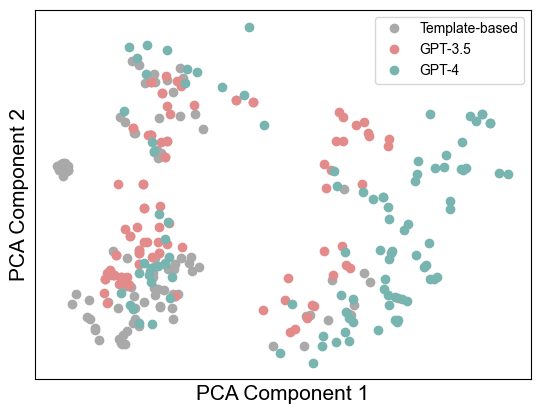

In [32]:
plt.rcParams['font.family'] = 'arial'
#for key, value in reduced_embedding_dict.items():
color=  [(170/256,170/256,170/256), (228/256,140/256,139/256), (120/256, 182/256, 177/256)]
for i, key in enumerate(['D', 'B', 'A']):
    value = reduced_embedding_dict[key]
    plt.plot(value[:, 0], value[:, 1], 'o', c=color[i])

plt.legend(['Template-based', 'GPT-3.5',  'GPT-4'])
plt.xticks([])
plt.yticks([])
plt.xlabel('PCA Component 1', fontsize=15)
plt.ylabel('PCA Component 2', fontsize= 15)

In [25]:
from scipy.spatial.distance import pdist, squareform

def calculate_diversity(embeddings):
    # Calculate pairwise Euclidean distances
    pairwise_distances = pdist(embeddings, 'euclidean')
    # Convert to square form and compute the mean
    mean_distance = np.mean(squareform(pairwise_distances))
    return mean_distance

diversity_scores = {key: calculate_diversity(value) for key, value in embed_dict.items()}

In [26]:
diversity_scores

{'A': 1.0222769244428658, 'B': 0.8971757755464032, 'D': 0.9628839555901296}